In [1]:
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Grab and process the raw data.
data_path = ('~/Desktop/Python Exercises/yelp_labelled.txt')
yelp_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
yelp_raw.columns = ['review', 'good']
pd.set_option('display.max_rows', 1000)

In [3]:
yelp_raw

,review,good
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [4]:
keywords = ['disappointed','below', 'lacked', 'slow', 'terrible', 'worst', 'never', 'nasty', 'bad', 'worst', "didn't", 'nasty', 'over', 'horrible']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    yelp_raw[str(key)] = yelp_raw.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [5]:
yelp_raw['allcaps'] = yelp_raw.review.str.isupper()

In [6]:
#yelp_raw['exclamation'] = yelp_raw.review.str.contains(
   #' ' + '!' + ' ',
    #case=True
#)

In [7]:
positive = ['love', 'great', 'best', 'enjoy', 'happy', 'amazing', 'worst', 'never', 'nasty']

for key in positive:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    yelp_raw[str(key)] = yelp_raw.review.str.contains(
        ' ' + str(key) + ' ',
        case=True
    )

In [8]:
#yelp_raw['good'] = (yelp_raw['good'] == 'good')
# Note that if you run this cell a second time everything will become false.
# So... Don't.

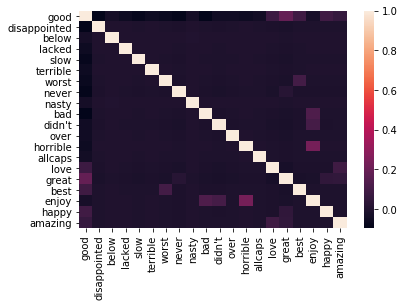

In [9]:
sns.heatmap(yelp_raw.corr())
#took out 'suck' and 'disgust' as features

In [10]:
data = yelp_raw[keywords + positive + ['allcaps']]
target = yelp_raw['good']

In [11]:
data

,disappointed,below,lacked,slow,terrible,worst,never,nasty,bad,worst,...,love,great,best,enjoy,happy,amazing,worst,never,nasty,allcaps
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [12]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 437


In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[ 75, 425],
       [ 12, 488]])

In [14]:
y_actual = yelp_raw.good
df_confmatrix = pd.crosstab(y_actual, y_pred)
df_confmatrix

col_0,0,1
good,,
0,75,425
1,12,488


In [15]:
print('Sensitivity:')
print((df_confmatrix[1][1]/(df_confmatrix[1][1] + df_confmatrix[0][1])) *100)

Sensitivity:
97.6


In [16]:
print('Specificity:')
print((df_confmatrix[1][0]/(df_confmatrix[0][0] + df_confmatrix[1][0])) *100)

Specificity:
85.0
